# Imported relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\1613615-Stock_Price_data_set.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


# Splitting Data In X and Y

In [5]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values
print(X)

[[2.67899994e+02 2.50029999e+02 2.62000000e+02 1.18961000e+07]
 [2.66700012e+02 2.45000000e+02 2.47699997e+02 1.25958000e+07]
 [2.72450012e+02 2.64329987e+02 2.66579987e+02 8.98150000e+06]
 ...
 [4.51980011e+02 4.26480011e+02 4.48250000e+02 1.43460000e+07]
 [4.29260010e+02 4.04279999e+02 4.21440002e+02 9.90520000e+06]
 [4.12769989e+02 3.96640015e+02 4.07309998e+02 7.78240000e+06]]


In [6]:
print(y)

[254.259995 265.720001 264.559998 ... 429.480011 405.600006 410.170013]


# Test-Train Split

In [7]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# Training the Model

In [8]:
#from sklearn.linear_model import LinearRegression
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)
#Printing Coefficient
print(Model.coef_)

# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

[ 8.09050090e-01  8.03609794e-01 -6.12467932e-01  5.27671227e-08]
[585.74315845 634.37795705 366.23226755 432.27317144 415.40265836
 343.81874371 500.73537239 531.52422436 347.77672976 333.82191665
 481.65040198 364.31116915 656.69480161 349.49953209 357.5698232
 325.23000872 396.15580993 258.74883705 266.63934811 541.92822185
 598.08062476 340.44017178 271.2818086  319.46950443 295.70492752
 363.11647787 417.95293966 541.46669152 502.33996285 501.91392015
 605.32838561 525.08016165 531.8504915  372.75009069 356.21169405
 273.61281187 351.74838207 537.99766612 357.56285555 668.32728368
 423.11774493 364.10260689 392.79556278 394.3387985  414.93092098
 503.64191404 447.4539796  295.18010552 378.28879719 551.74595269
 283.89604157 313.37481342 330.76203862 302.83221426 350.53688764
 298.11553671 514.94682489 485.11627912 610.40186174 488.4532709
 379.79837888 487.12901993 306.91184431 501.37838764 473.4151176
 524.10227463 679.93834712 492.53622162 534.52591211 288.08602016
 284.11356402

# Combining The Actual and Predicted data to match

In [9]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,591.150024,585.743158
1,634.809998,634.377957
2,365.489990,366.232268
3,433.829987,432.273171
4,419.730011,415.402658
5,339.500000,343.818744
6,501.089996,500.735372
7,534.659973,531.524224
8,349.190002,347.776730
9,336.059998,333.821917


# Validating the Fit

In [10]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 2.72626488216208
Mean Squared Error: 14.706214844420286
Root Mean Squared Error: 3.8348682955768227


<AxesSubplot:>

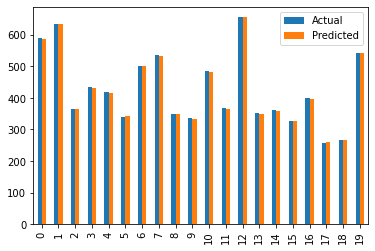

In [11]:
graph = data1.head(20)
graph.plot(kind='bar')